In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from utils import modeling 
from utils import analysis_pipeline

In [3]:
sample1 = modeling.sample(0,1,2)
sample2 = modeling.sample(1,1,2)
print(sample1,sample2)

[-0.0806308  -2.65024503] [0.41269376 0.84326246]


In [4]:
# decision1 = modeling.decision(sample1,0.5)
# decision2 = modeling.decision(sample2,0.5)
# print(decision1,decision2)

In [5]:
# print(modeling.accuracy([0,0],decision1))
# print(modeling.accuracy([1,1],decision2))

In [6]:
# ground_truth = [2,1]
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0,1,2),0.4)))
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0.5,1,2),0.4)))

In [7]:
set_sizes = np.random.randint(3,6,1000)
df = pd.DataFrame(set_sizes, columns=['set_size'])
mean = []
sample = []
decision = []
accuracy = []

df


,set_size
0,5
1,3
2,5
3,4
4,3
...,...
995,3
996,5
997,5
998,4


In [8]:
stimulus = []
for (row_index,row_data) in df.iterrows():
    stimulus.append(modeling.generate_stim())

df['stim'] = stimulus

In [9]:
mean = []
for (row_index,row_data) in df.iterrows():
    mean.append(modeling.generate_mean(row_data['set_size']))

df['mean'] = mean

In [10]:
sample = []
for (row_index,row_data) in df.iterrows():
    sample.append(modeling.sample(0.5,1,1))

df['sample'] = sample

In [11]:
decision = []
for (row_index,row_data) in df.iterrows():
    decision.append(modeling.decision(row_data['stim'],row_data['sample'],0.5))

df['decision'] = decision

In [12]:
ground_truth = []
for (row_index,row_data) in df.iterrows():
    ground_truth.append(1)

df['ground_truth'] = ground_truth

In [13]:
df

,set_size,stim,mean,sample,decision,ground_truth
0,5,0.488838,1.400000,[0.8681383864428233],0.488838,1
1,3,0.488838,2.333333,[-0.059371705416533804],0.363920,1
2,5,0.488838,1.400000,[-0.008521802634737119],0.074521,1
3,4,0.488838,1.750000,[0.8613107471662454],0.488838,1
4,3,0.488838,2.333333,[1.2912589797556944],0.488838,1
...,...,...,...,...,...,...
995,3,0.488838,2.333333,[0.5947096214431659],0.488838,1
996,5,0.488838,1.400000,[0.4010102085085898],0.601792,1
997,5,0.488838,1.400000,[1.4171419232151323],0.488838,1
998,4,0.488838,1.750000,[0.2981633538393293],0.011750,1


In [14]:
accuracy = []
for (row_index,row_data) in df.iterrows():
    accuracy.append(modeling.accuracy(row_data['stim'],row_data['decision']))
    
df['correct'] = accuracy

In [15]:
df

,set_size,stim,mean,sample,decision,ground_truth,correct
0,5,0.488838,1.400000,[0.8681383864428233],0.488838,1,1
1,3,0.488838,2.333333,[-0.059371705416533804],0.363920,1,0
2,5,0.488838,1.400000,[-0.008521802634737119],0.074521,1,0
3,4,0.488838,1.750000,[0.8613107471662454],0.488838,1,1
4,3,0.488838,2.333333,[1.2912589797556944],0.488838,1,1
...,...,...,...,...,...,...,...
995,3,0.488838,2.333333,[0.5947096214431659],0.488838,1,1
996,5,0.488838,1.400000,[0.4010102085085898],0.601792,1,0
997,5,0.488838,1.400000,[1.4171419232151323],0.488838,1,1
998,4,0.488838,1.750000,[0.2981633538393293],0.011750,1,0


<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

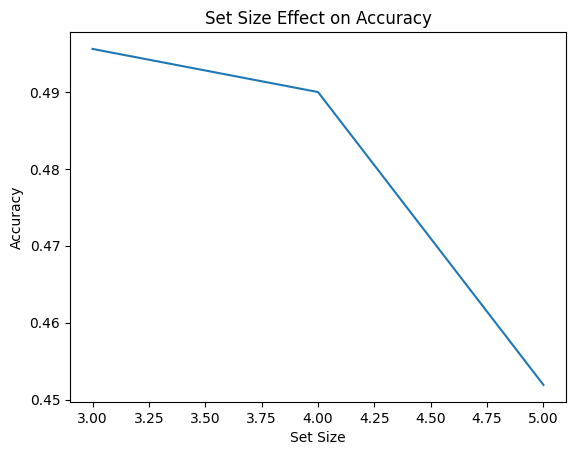

In [16]:
df.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy')

In [17]:
stim_angle = []
for (row_index,row_data) in df.iterrows():
    stim_angle.append(analysis_pipeline.rad_convert(row_data['stim']))
    
df['stim_angle'] = stim_angle


In [18]:
dec_angle = []
for (row_index,row_data) in df.iterrows():
    dec_angle.append(analysis_pipeline.rad_convert(row_data['decision']))
    
df['dec_angle'] = dec_angle


In [19]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim'],row_data['decision']))
    
df['ang_dist'] = ang_dist

In [20]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    ang_dist.append(row_data['stim'] - row_data['decision'])
    
df['ang_dist'] = ang_dist

In [21]:
df

,set_size,stim,mean,sample,decision,ground_truth,correct,stim_angle,dec_angle,ang_dist
0,5,0.488838,1.400000,[0.8681383864428233],0.488838,1,1,3.07146,3.071460,0.000000
1,3,0.488838,2.333333,[-0.059371705416533804],0.363920,1,0,3.07146,2.286575,0.124918
2,5,0.488838,1.400000,[-0.008521802634737119],0.074521,1,0,3.07146,0.468230,0.414317
3,4,0.488838,1.750000,[0.8613107471662454],0.488838,1,1,3.07146,3.071460,0.000000
4,3,0.488838,2.333333,[1.2912589797556944],0.488838,1,1,3.07146,3.071460,0.000000
...,...,...,...,...,...,...,...,...,...,...
995,3,0.488838,2.333333,[0.5947096214431659],0.488838,1,1,3.07146,3.071460,0.000000
996,5,0.488838,1.400000,[0.4010102085085898],0.601792,1,0,3.07146,3.781169,-0.112954
997,5,0.488838,1.400000,[1.4171419232151323],0.488838,1,1,3.07146,3.071460,0.000000
998,4,0.488838,1.750000,[0.2981633538393293],0.011750,1,0,3.07146,0.073824,0.477088


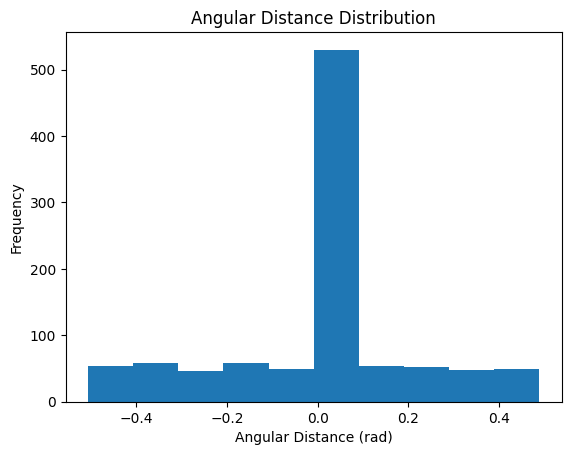

In [22]:
analysis_pipeline.plot_hist('ang_dist',df,'Angular Distance (rad)','Angular Distance Distribution')

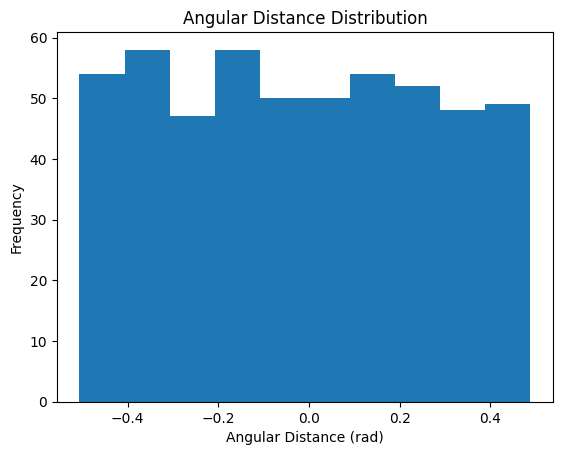

In [23]:
incorrect_df = df[df['correct'] == 0]
analysis_pipeline.plot_hist('ang_dist',incorrect_df,'Angular Distance (rad)','Angular Distance Distribution')

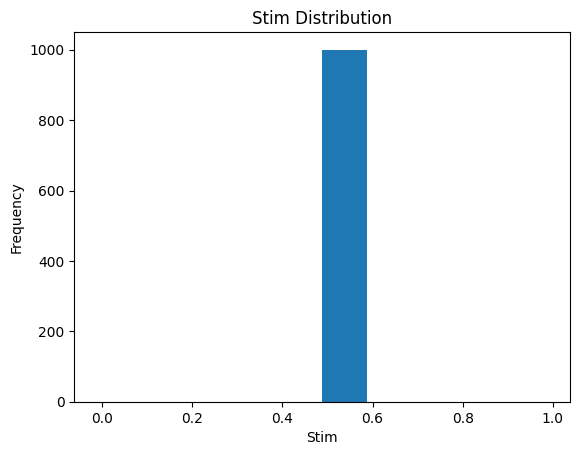

In [24]:
analysis_pipeline.plot_hist('stim',df,'Stim','Stim Distribution')

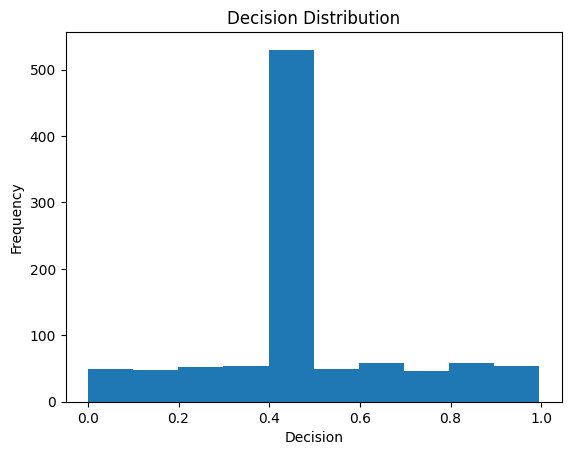

In [25]:
analysis_pipeline.plot_hist('decision',df,'Decision','Decision Distribution')